<a href="https://colab.research.google.com/github/Bepo2002/Humbug-4YP/blob/main/K_with_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Rate: 44100


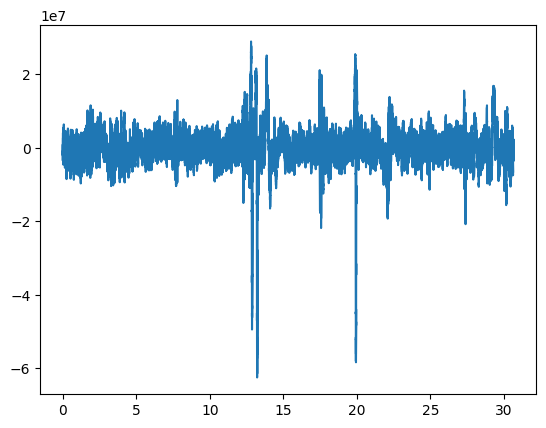

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

samplerate, data_o = wavfile.read('./drive/MyDrive/anoph_arabien.wav')

print("Sample Rate: " + str(samplerate))

plt.plot(np.linspace(0, len(data_o)/samplerate, num=len(data_o)),data_o)
plt.show()

# Reshape Data and remove excess (crop to 30s)

In [3]:
data = np.array(data_o)
bin_size = int(samplerate)
rows = int(data.size/bin_size)
data = data[:rows*bin_size]
data = np.reshape(data,(rows,bin_size))
data = np.concatenate((data,np.zeros((rows,1))),axis=1)
data.shape

(30, 44101)

In [4]:
from numpy import linalg as LA

cluster_1 = data[0,:bin_size]
cluster_2 = data[1,:bin_size]

num_of_its = 0
while True:
  count1 = 0
  count2 = 0
  av1 = np.zeros((1,bin_size))
  av2 = np.zeros((1,bin_size))

  for row in data:
    dist_to_1 = LA.norm(row[:bin_size] - cluster_1)
    dist_to_2 = LA.norm(row[:bin_size] - cluster_2)
    if dist_to_1 < dist_to_2:
      row[bin_size] = 1
      av1 = av1 + row[:bin_size]
      count1 += 1
    else:
      row[bin_size] = 2
      av2 = av2 + row[:bin_size]
      count2 += 1
  av1 = av1/count1
  av2 = av2/count2

  if np.array_equal(cluster_1, av1) and np.array_equal(cluster_2, av2):
    break
  else:
    cluster_1 = av1
    cluster_2 = av2
    num_of_its += 1

print(num_of_its)

print(data[:,-1])

4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
